In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

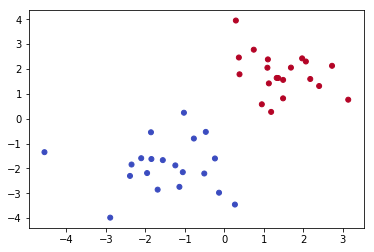

In [2]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)

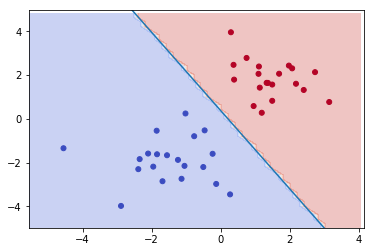

In [3]:
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

In [24]:
def make_region(X,Y,clf,ax):
    fig, ax = plt.subplots()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

    Z = Z.reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
    ax.axis([x_min, x_max,y_min, y_max])

**Supervised learning**:

  - Linear models (Ridge, Lasso, Elastic Net, ...)
  - Support Vector Machines
  - Tree-based methods (Random Forests, Bagging, GBRT, ...)
  - Nearest neighbors 
  - Neural networks (basics)

**Unsupervised learning**:

  - Clustering (KMeans, Ward, ...)
  - Outlier detection

## Accuracy and precision

1. precision: 
The fraction of relevant instances among the retrieved instances, 
1. recall:
The fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
1. F-score


* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

Take a look at [HERE](https://en.wikipedia.org/wiki/F1_score) or [HERE](https://en.wikipedia.org/wiki/Precision_and_recall).

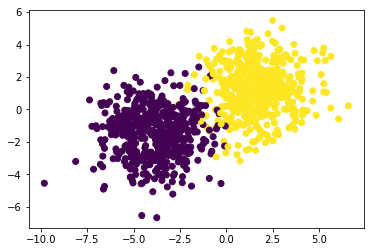

In [6]:
# Generate data
from sklearn.datasets import make_blobs,make_circles,make_moons
X, y = make_blobs(n_samples=1000, centers=2,
                  cluster_std=1.5,
                  center_box=(-4.0, 4.0))
# X, y = make_circles(n_samples=1000, noise=.1, factor=.5)
# X,y = make_moons(n_samples=1000, noise=.2)

plt.scatter(X[:,0],X[:,1],c=y,)


In [7]:
print(X[:3]) 

[[ 3.3168855   0.8283272 ]
 [-2.64062115 -0.47053114]
 [ 3.10295584  0.86800108]]


In [8]:
print(y[:3])

[1 0 1]


In [9]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [10]:
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]

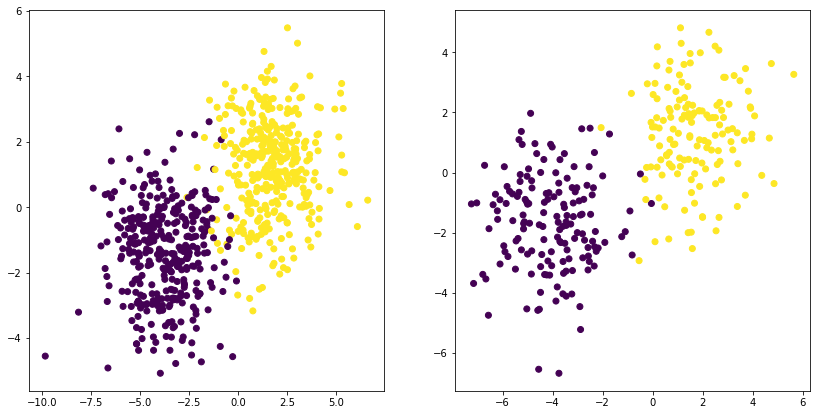

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train,)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test,)


## K-Nearest Neighbours

In [21]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       155
           1       0.99      0.98      0.98       145

   micro avg       0.98      0.98      0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[153   2]
 [  3 142]]
accuracy is 0.9833333333333333


In [22]:
# Compute (approximate) class probabilities
print(Model.predict_proba(X_test[:5]))

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


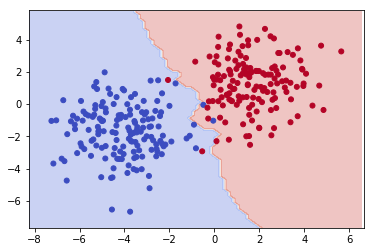

In [25]:
make_region(X_test,y_test,Model,ax)

##  Radius Neighbors Classifier

In [26]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       155
           1       0.91      1.00      0.95       145

   micro avg       0.95      0.95      0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300

[[141  14]
 [  0 145]]
accuracy is  0.9533333333333334


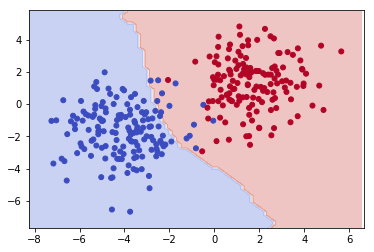

In [27]:
make_region(X_test,y_test,Model,ax)

## Naive Bayes

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}

In [28]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.99      0.99       145

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[153   2]
 [  2 143]]
accuracy is 0.9866666666666667


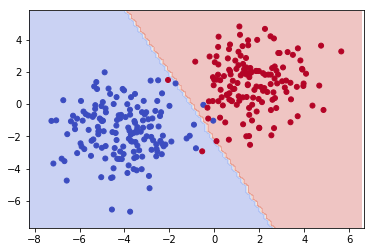

In [29]:
make_region(X_test,y_test,Model,ax)

## SVM

In [32]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC(kernel='linear')
# Model = svm.LinearSVC(C=1)

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.99      0.99       145

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[153   2]
 [  2 143]]
accuracy is 0.9866666666666667


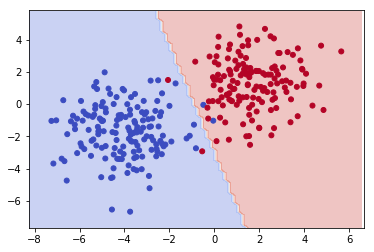

In [33]:
make_region(X_test,y_test,Model,ax)

## Decision Tree

In [35]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.98      0.98      0.98       145

   micro avg       0.98      0.98      0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[152   3]
 [  3 142]]
accuracy is 0.98


In [39]:
y_pred = Model.predict(X_train)

# Summary of the predictions made by the classifier
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       355

   micro avg       1.00      1.00      1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



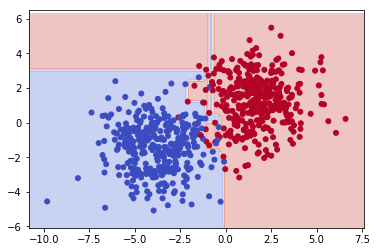

In [40]:
make_region(X_train,y_train,Model,ax)

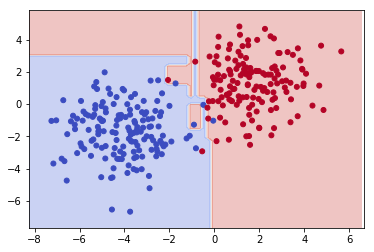

In [41]:
make_region(X_test,y_test,Model,ax)

## RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       155
           1       0.98      0.99      0.99       145

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[152   1]
 [  3 144]]
accuracy is  0.9866666666666667


/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
# def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
#     ax = ax or plt.gca()
    
#     # Plot the training points
#     ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
#                clim=(y.min(), y.max()), zorder=3)
#     ax.axis('tight')
#     ax.axis('off')
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
    
#     # fit the estimator
#     model.fit(X, y)
#     xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
#                          np.linspace(*ylim, num=200))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#     # Create a color plot with the results
#     n_classes = len(np.unique(y))
#     contours = ax.contourf(xx, yy, Z, alpha=0.3,
#                            levels=np.arange(n_classes + 1) - 0.5,
#                            cmap=cmap,
#                            zorder=1)

#     ax.set(xlim=xlim, ylim=ylim)

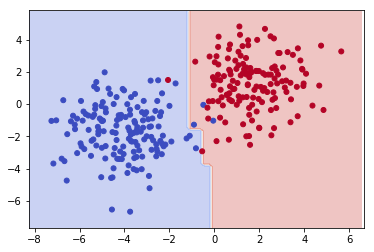

In [46]:
make_region(X_test,y_test,Model,ax)

In [47]:
Model.feature_importances_

array([0.76430017, 0.23569983])

## Neural network

![](https://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork1/NN-with-components-w11-etc.png)

In [ ]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

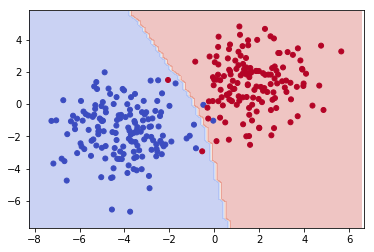

In [51]:
make_region(X_test,y_test,Model,ax)

In [68]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u